In [1]:
import sys
sys.path.insert(0,"src")
sys.path.insert(0,"../src")

### Example 1: Long Call Strategy


underlying_price=100.0 underlying_symbol='XYZ' days_to_expiration=30.0 volatility=0.3 expected_move=8.600732686214938 pop=0.21848346818853234 expected_profit=-0.2109222338162562 expected_roi=-1.5216226307335774 cost=168.65025924292 margin=168.65025924292 theta=0.6249814604296636 delta=0.3168613655540851 vega=10.209907457200684 gamma=0.04140684690975833 title='Long Call' stddev_range=3.0


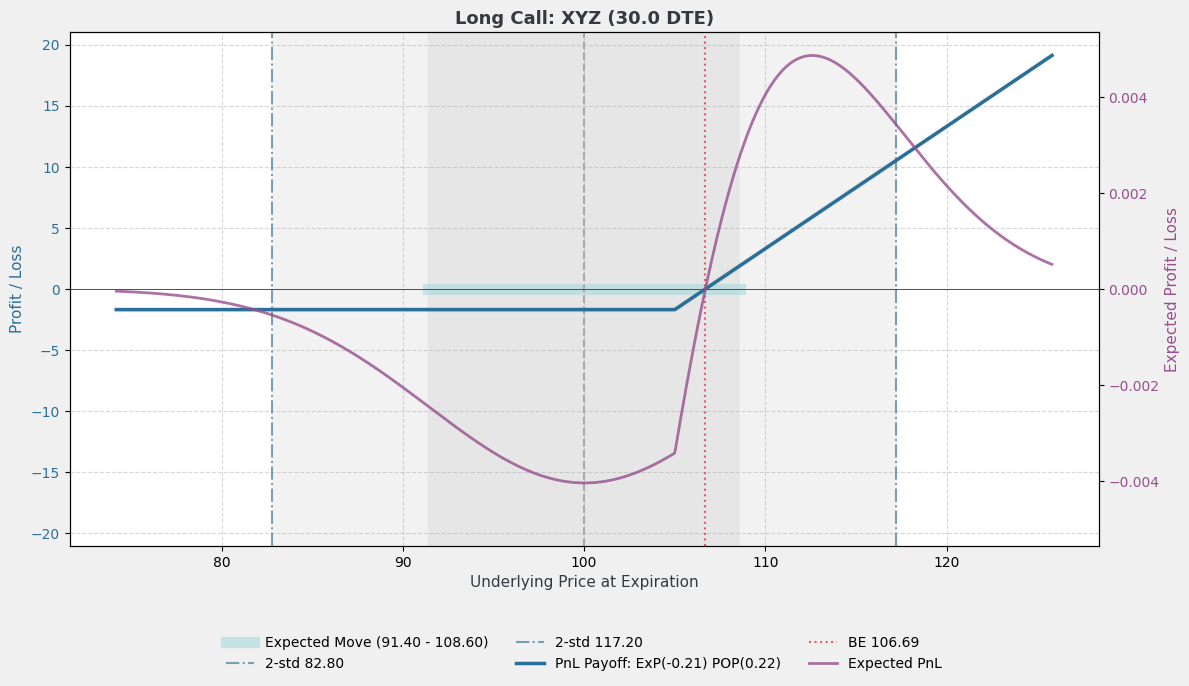

In [2]:
from option_strategy_sim import OptionStrategy

# Initialize the option strategy
ostrat = OptionStrategy(underlying_price=100, days_to_expiration=30, volatility=0.3, title="Long Call")

# Add a long call option leg
ostrat.add_leg(option_type='C', strike_price=105, quantity=1)

# Print a summary of the strategy
print(ostrat.repr())

# Plot the strategy's P&L
ostrat.plot_strategy()


### Example 2: Short Put Strategy


underlying_price=50.0 underlying_symbol='XYZ' days_to_expiration=60.0 volatility=0.3 expected_move=6.081636405595374 pop=0.8202121979678375 expected_profit=-0.1392655637013267 expected_roi=-0.019055977472473302 cost=4445.84302785586 margin=554.1569721441406 theta=0.07504861280478492 delta=0.15996333839898913 vega=4.9317059900913005 gamma=0.040001615252962766 title='Short Put' stddev_range=3.0


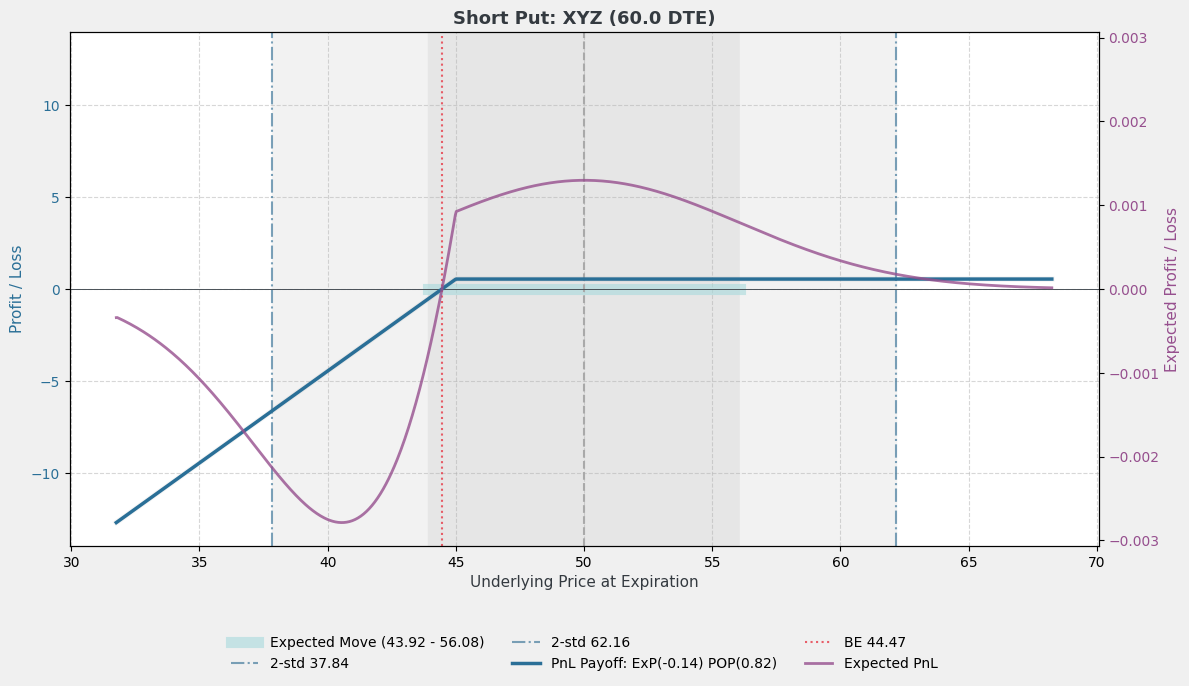

In [3]:
from option_strategy_sim import OptionStrategy

# Initialize the strategy
ostrat = OptionStrategy(underlying_price=50, days_to_expiration=60, title="Short Put")

# Add a short put option leg
ostrat.add_leg(option_type='P', strike_price=45, quantity=-1, volatility=0.30)

# Display key statistics
print(ostrat.repr())

# Visualize the strategy
ostrat.plot_strategy()


### Example 3: Iron Condor Strategy


underlying_price=100.0 underlying_symbol='XYZ' days_to_expiration=45.0 volatility=0.175 expected_move=6.144660227796855 pop=0.9154980278115109 expected_profit=0.2780350407087193 expected_roi=0.4657314508464208 cost=484.22177713619504 margin=484.22177713619504 theta=0.1933800333870672 delta=-0.05085915120209511 vega=10.967046550138337 gamma=0.04539147608834221 title='Iron Condor' stddev_range=3.0


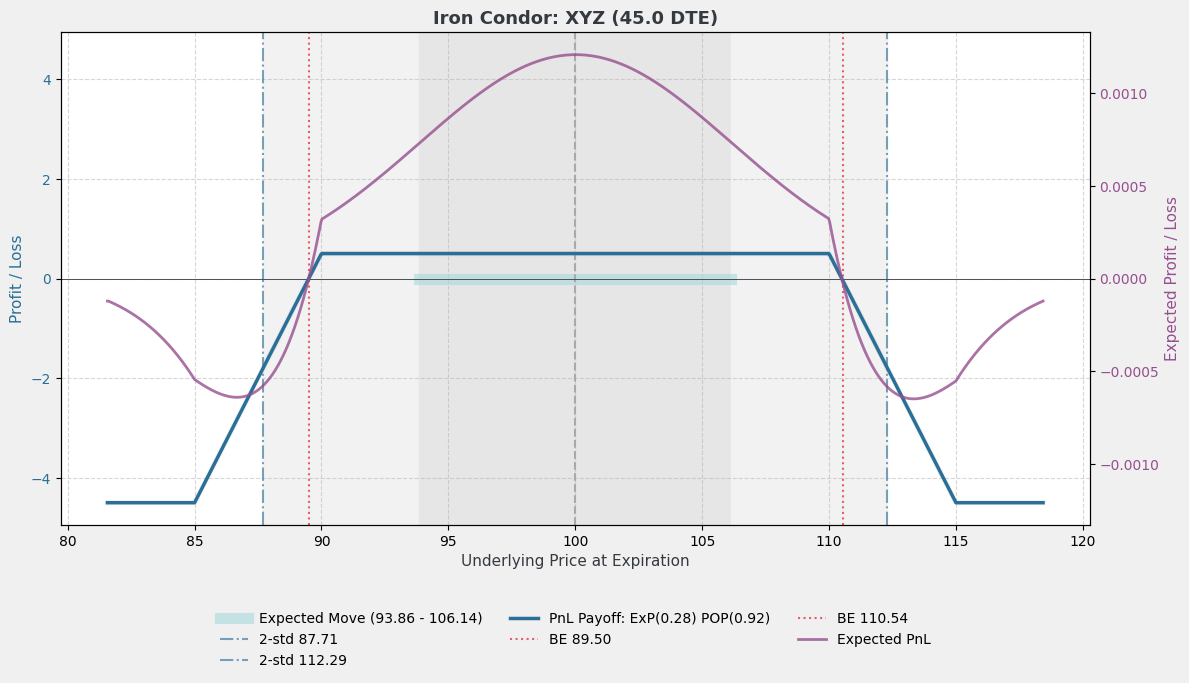

In [4]:
from option_strategy_sim import OptionStrategy

# Define strategy parameters
ostrat = OptionStrategy(underlying_price=100, days_to_expiration=45, title="Iron Condor")

# Add the four legs of the Iron Condor
# ostrat.add_leg(option_type='C', strike_price=110, quantity=-1, volatility=0.20) # Long Call
# ostrat.add_leg(option_type='C', strike_price=115, quantity=1, volatility=0.15) # Short Call
# ostrat.add_leg(option_type='P', strike_price=90, quantity=-1, volatility=0.20)  # Short Put
# ostrat.add_leg(option_type='P', strike_price=85, quantity=1, volatility=0.15)  # Long Put

# We can add them together as a list group or a pandas dataframe
iron_condor_legs = [
    {"option_type":'C', "strike_price":110, "quantity":-1, "volatility":0.20},
    {"option_type":'C', "strike_price":115, "quantity":1, "volatility":0.15},
    {"option_type":'P', "strike_price":90,  "quantity":-1, "volatility":0.20},
    {"option_type":'P', "strike_price":85,  "quantity":1, "volatility":0.15},
]
ostrat.add_legs( iron_condor_legs )

# Analyze the strategy
print(ostrat.repr())

# Plot the payoff
ostrat.plot_strategy()


### Example 4: Visualizing P&L at Different Expirations


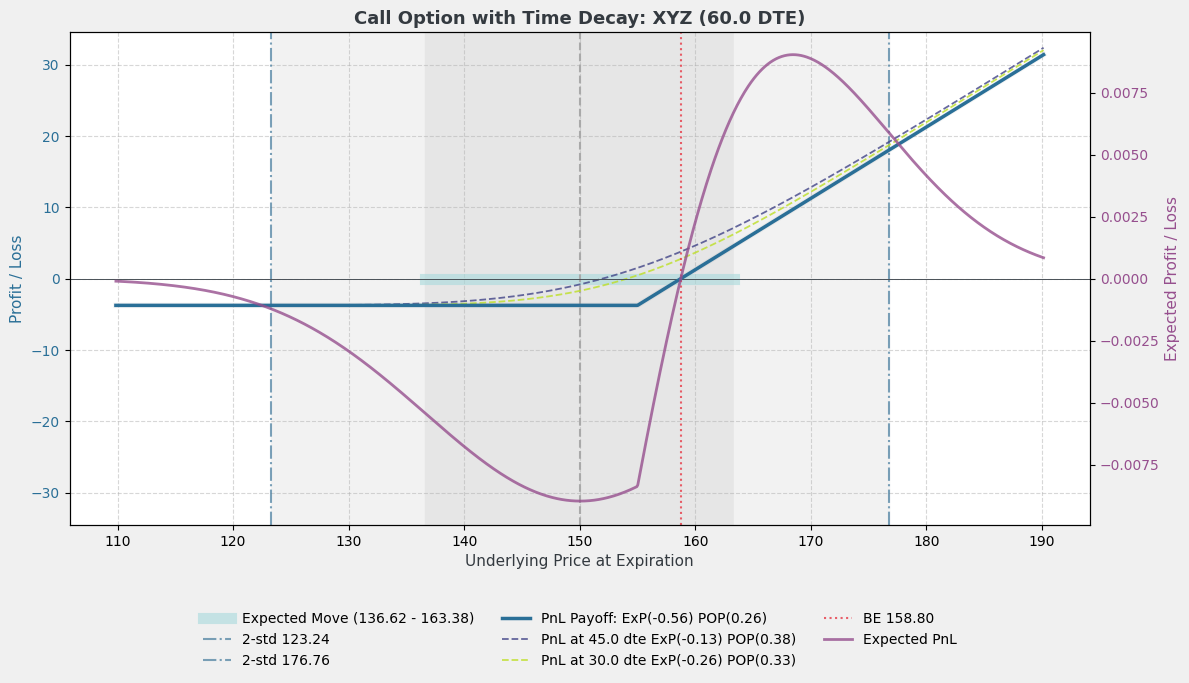

In [5]:
from option_strategy_sim import OptionStrategy

# Create a simple call option strategy
ostrat = OptionStrategy(underlying_price=150, days_to_expiration=60, title="Call Option with Time Decay")
ostrat.add_leg(option_type='C', strike_price=155, quantity=1, volatility=0.22)

# Add P&L calculations at different days to expiration
ostrat.add_pnl(days_forward=15)  # P&L 15 days forward
ostrat.add_pnl(days_forward=30)  # P&L 30 days forward

# Plot the strategy's P&L
# savefig allows us to save the figure to a PNG file
ostrat.plot_strategy(savefig='ic.png', show=True)
